# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [73]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        request = requests.get(city_url + city)
        city_weather = request.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 2 of Set 1 | puerto baquerizo moreno
City not found. Skipping...
Processing Record 3 of Set 1 | acapulco de juarez
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
City not found. Skipping...
Processing Record 5 of Set 1 | sake
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
City not found. Skipping...
Processing Record 7 of Set 1 | cabedelo
City not found. Skipping...
Processing Record 8 of Set 1 | happy valley-goose bay
City not found. Skipping...
Processing Record 9 of Set 1 | zhicheng
City not found. Skipping...
Processing Record 10 of Set 1 | jisr ash shughur
City not found. Skipping...
Processing Record 11 of Set 1 | lundazi
City not found. Skipping...
Processing Record 12 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 13 of Set 1 | santa ana
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 16 of Set 3 | qaqortoq
City not found. Skipping...
Processing Record 17 of Set 3 | iqaluit
City not found. Skipping...
Processing Record 18 of Set 3 | ribeira grande
City not found. Skipping...
Processing Record 19 of Set 3 | badger
City not found. Skipping...
Processing Record 20 of Set 3 | nar'yan-mar
City not found. Skipping...
Processing Record 21 of Set 3 | murun-kuren
City not found. Skipping...
Processing Record 22 of Set 3 | keren
City not found. Skipping...
Processing Record 23 of Set 3 | ust-nera
City not found. Skipping...
Processing Record 24 of Set 3 | umea
City not found. Skipping...
Processing Record 25 of Set 3 | chibougamau
City not found. Skipping...
Processing Record 26 of Set 3 | mar del plata
City not found. Skipping...
Processing Record 27 of Set 3 | playa vicente
City not found. Skipping...
Processing Record 28 of Set 3 | bethel
City not found. Skipping...
Processing Record 29 of Set 3 | tura
City not found. Skipping.

City not found. Skipping...
Processing Record 35 of Set 5 | cafayate
City not found. Skipping...
Processing Record 36 of Set 5 | benguela
City not found. Skipping...
Processing Record 37 of Set 5 | east london
City not found. Skipping...
Processing Record 38 of Set 5 | revda
City not found. Skipping...
Processing Record 39 of Set 5 | andrelandia
City not found. Skipping...
Processing Record 40 of Set 5 | salinas
City not found. Skipping...
Processing Record 41 of Set 5 | kristiansund
City not found. Skipping...
Processing Record 42 of Set 5 | namibe
City not found. Skipping...
Processing Record 43 of Set 5 | klyuchi
City not found. Skipping...
Processing Record 44 of Set 5 | cable beach
City not found. Skipping...
Processing Record 45 of Set 5 | ribadeo
City not found. Skipping...
Processing Record 46 of Set 5 | vizinga
City not found. Skipping...
Processing Record 47 of Set 5 | novhorod-sivers'kyy
City not found. Skipping...
Processing Record 48 of Set 5 | quellon
City not found. Skip

City not found. Skipping...
Processing Record 4 of Set 8 | kyren
City not found. Skipping...
Processing Record 5 of Set 8 | kalmunai
City not found. Skipping...
Processing Record 6 of Set 8 | shadegan
City not found. Skipping...
Processing Record 7 of Set 8 | beberibe
City not found. Skipping...
Processing Record 8 of Set 8 | kisangani
City not found. Skipping...
Processing Record 9 of Set 8 | kargasok
City not found. Skipping...
Processing Record 10 of Set 8 | skaelskor
City not found. Skipping...
Processing Record 11 of Set 8 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 12 of Set 8 | rikaze
City not found. Skipping...
Processing Record 13 of Set 8 | manokwari
City not found. Skipping...
Processing Record 14 of Set 8 | turiacu
City not found. Skipping...
Processing Record 15 of Set 8 | geraldton
City not found. Skipping...
Processing Record 16 of Set 8 | holualoa
City not found. Skipping...
Processing Record 17 of Set 8 | vernon
City not found. Skipping...
Processing R

City not found. Skipping...
Processing Record 22 of Set 10 | seosan
City not found. Skipping...
Processing Record 23 of Set 10 | turpan
City not found. Skipping...
Processing Record 24 of Set 10 | nishinoomote
City not found. Skipping...
Processing Record 25 of Set 10 | santana
City not found. Skipping...
Processing Record 26 of Set 10 | arkalyk
City not found. Skipping...
Processing Record 27 of Set 10 | agva
City not found. Skipping...
Processing Record 28 of Set 10 | eregli
City not found. Skipping...
Processing Record 29 of Set 10 | sao tome
City not found. Skipping...
Processing Record 30 of Set 10 | chita
City not found. Skipping...
Processing Record 31 of Set 10 | queenstown
City not found. Skipping...
Processing Record 32 of Set 10 | bakanas
City not found. Skipping...
Processing Record 33 of Set 10 | keflavik
City not found. Skipping...
Processing Record 34 of Set 10 | alice springs
City not found. Skipping...
Processing Record 35 of Set 10 | pimentel
City not found. Skipping.

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ["City", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed",
                                                  "Country", "Date"])
# Show Record Count
city_data_df.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [77]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

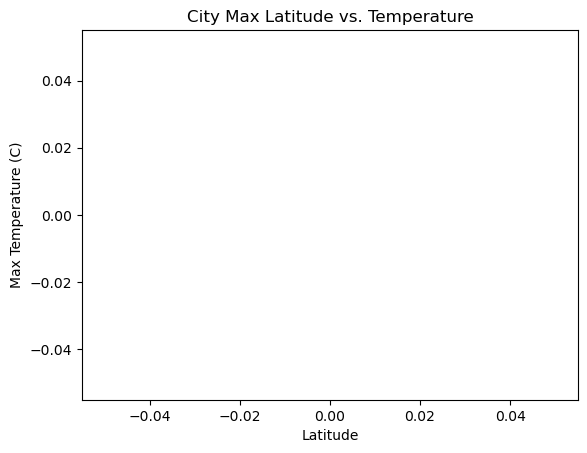

In [79]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

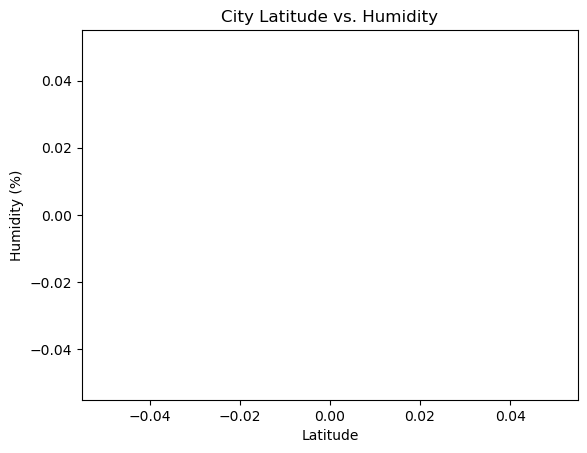

In [80]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

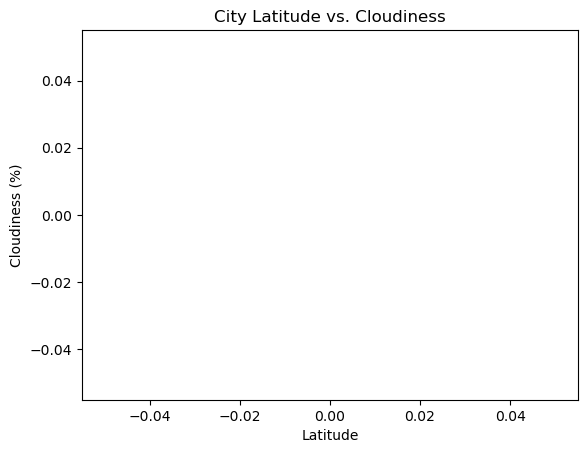

In [81]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

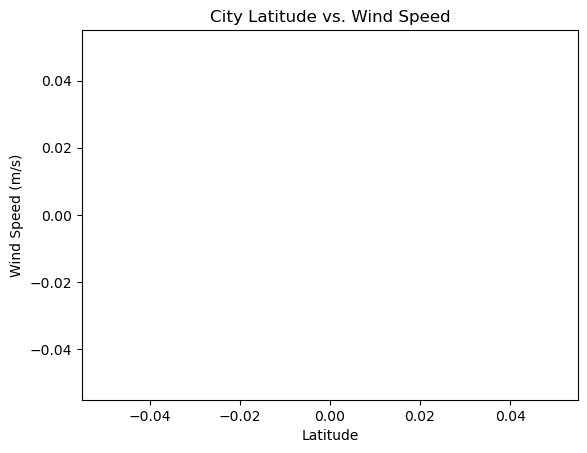

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_line = x * slope + intercept
    print(f'The r-value is: {r_value}')
    
    plt.scatter(x, y)
    plt.plot(x, r_line, color='red')
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.text(min(x), max(y), line_eq, fontsize=12, color='red') 

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


###  Temperature vs. Latitude Linear Regression Plot

In [86]:
# Linear regression on Northern Hemisphere
plot = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

ValueError: Inputs must not be empty.

In [ ]:
# Linear regression on Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [ ]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [ ]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [ ]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE